#** IMDB Dataset of 50K Movie Reviews bold text**
IMDB dataset having 50K movie reviews for natural language processing .This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. 

# **IMPORTING DATA**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [3]:
import pandas as pd
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Exploratory data analysis

In [4]:
#Sentiment count
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


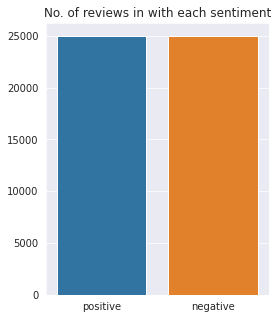

In [5]:
# Plotting number of reviews in each sentiments 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(data['sentiment'])
plt.title('No. of reviews in with each sentiment')
plt.xlabel("")
plt.ylabel("")
plt.show()

* So from here we can inference that the number of sentiments are same of each review and data set is balanced.

In [6]:
# Counting missing values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
review = data['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Remove html tags

In [8]:
import re
from bs4 import BeautifulSoup
soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

## Remove everything except lower/upper case letters using Regular Expressions.

In [9]:
review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

## Converting everything into lowercase.

In [10]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

## Get rid of redundant words which does not add much meaning

### Removing Stop words

In [11]:
#Stopwords removal - since stopwords removal works on every word in your text we need to split the text.
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [15]:

import nltk
stop_words = nltk.corpus.stopwords.words('english')
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### Finally removing stop words

In [16]:
import csv
sentences = []
labels = []
with open("IMDB Dataset.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        sentence = row[0]
        for word in stop_words:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(sentences[0])
print(labels[0])

One reviewers mentioned watching 1 Oz episode hooked. They right, exactly happened me.<br /><br />The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. This show pulls punches regards drugs, sex violence. Its hardcore, classic use word.<br /><br />It called OZ nickname given Oswald Maximum Security State Penitentary. It focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.<br /><br />I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. The first episode I ever saw struck nasty surreal, I say I ready it, I watched more, I developed taste Oz, got accustomed high levels graphic violence. Not violence, inj

## Let's encode Labels 

In [17]:
# Lets encode labels: each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
labels= label_encoder.fit_transform(labels)
print(labels[:10])


[1 1 1 0 1 1 1 0 0 1]


# Splitting in test and train data

In [18]:
training_portion = .8
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

40000
40000
40000
10000
10000


Converting train and test labels to numpy array

In [19]:
import numpy as np
training_labels_final = np.array(train_labels)
testing_labels_final = np.array(validation_labels)


# TOKENIZING

In [20]:
vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(validation_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# Fitting different models 

## **Model Definition with GRU**

In [21]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12672     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 333,069
Trainable params: 333,069
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
1250/1250 [==============================] - 81s 65ms/step - loss: 0.4048 - accuracy: 0.8063 - val_loss: 0.2880 - val_accuracy: 0.8859
Epoch 2/50
1250/1250 [==============================] - 81s 65ms/step - loss: 0.2478 - accuracy: 0.9018 - val_loss: 0.2748 - val_accuracy: 0.8878
Epoch 3/50
1250/1250 [==============================] - 82s 66ms/step - loss: 0.1820 - accuracy: 0.9313 - val_loss: 0.3021 - val_accuracy: 0.8824
Epoch 4/50
1250/1250 [==============================] - 79s 63ms/step - loss: 0.1213 - accuracy: 0.9562 - val_loss: 0.3640 - val_accuracy: 0.8755
Epoch 5/50
1250/1250 [==============================] - 80s 64ms/step - loss: 0.0746 - accuracy: 0.9740 - val_loss: 0.4418 - val_accuracy: 0.8644
Epoch 6/50
1250/1250 [==============================] - 79s 63ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.5545 - val_accuracy: 0.8661
Epoch 7/50
1250/1250 [==============================] - 77s 62ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.6405 -

# Creating function to plot accuracy and loss

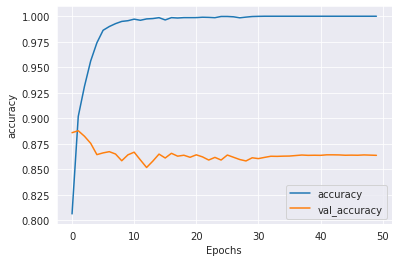

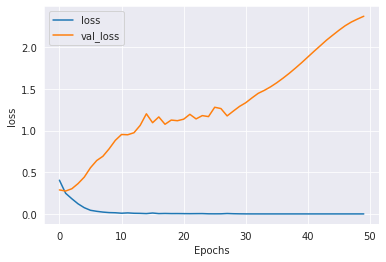

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## **Model Definition with Conv1D**

In [24]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          20608     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 341,389
Trainable params: 341,389
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))


Epoch 1/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 2/50
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 3/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 4/50
1250/1250 [==============================] - 27s 21ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 5/50
1250/1250 [==============================] - 28s 22ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 6/50
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 7/50
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 -

## Plotting accuracy and loss

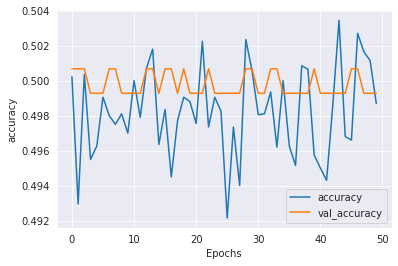

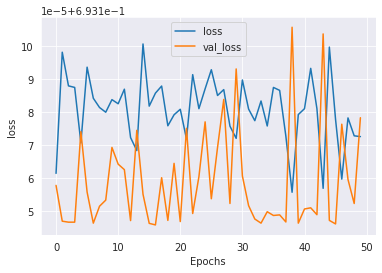

In [26]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Model Definition with Single Layer LSTM

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 370,445
Trainable params: 370,445
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
1250/1250 [==============================] - 130s 104ms/step - loss: 0.3821 - accuracy: 0.8263 - val_loss: 0.2855 - val_accuracy: 0.8832
Epoch 2/50
1250/1250 [==============================] - 130s 104ms/step - loss: 0.2553 - accuracy: 0.8991 - val_loss: 0.3183 - val_accuracy: 0.8642
Epoch 3/50
1250/1250 [==============================] - 131s 104ms/step - loss: 0.1998 - accuracy: 0.9239 - val_loss: 0.2953 - val_accuracy: 0.8779
Epoch 4/50
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1521 - accuracy: 0.9447 - val_loss: 0.3475 - val_accuracy: 0.8768
Epoch 5/50
1250/1250 [==============================] - 129s 104ms/step - loss: 0.1168 - accuracy: 0.9583 - val_loss: 0.4506 - val_accuracy: 0.8647
Epoch 6/50
1250/1250 [==============================] - 131s 105ms/step - loss: 0.0855 - accuracy: 0.9710 - val_loss: 0.4479 - val_accuracy: 0.8639
Epoch 7/50
1250/1250 [==============================] - 127s 102ms/step - loss: 0.0592 - accuracy: 0.9811 - val_

## Plotting accuracy and loss

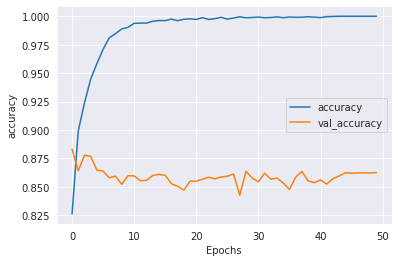

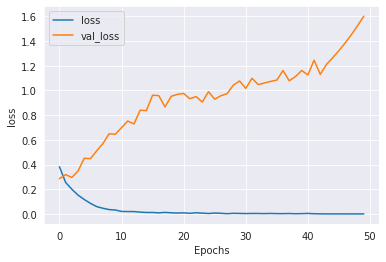

In [29]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## **Model Definition with Multi Layer LSTM**

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 411,277
Trainable params: 411,277
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
1250/1250 [==============================] - 219s 176ms/step - loss: 0.5990 - accuracy: 0.6838 - val_loss: 0.5584 - val_accuracy: 0.7162
Epoch 2/50
1250/1250 [==============================] - 217s 174ms/step - loss: 0.4045 - accuracy: 0.8157 - val_loss: 0.3188 - val_accuracy: 0.8622
Epoch 3/50
1250/1250 [==============================] - 218s 174ms/step - loss: 0.2643 - accuracy: 0.8948 - val_loss: 0.2832 - val_accuracy: 0.8824
Epoch 4/50
1250/1250 [==============================] - 221s 177ms/step - loss: 0.2071 - accuracy: 0.9228 - val_loss: 0.3030 - val_accuracy: 0.8757
Epoch 5/50
1250/1250 [==============================] - 236s 189ms/step - loss: 0.1661 - accuracy: 0.9410 - val_loss: 0.3530 - val_accuracy: 0.8690
Epoch 6/50
1250/1250 [==============================] - 236s 189ms/step - loss: 0.1340 - accuracy: 0.9540 - val_loss: 0.3834 - val_accuracy: 0.8705
Epoch 7/50
1250/1250 [==============================] - 237s 190ms/step - loss: 0.1019 - accuracy: 0.9663 - val_

# Plotting accuracy and loss

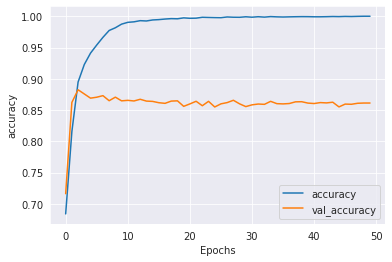

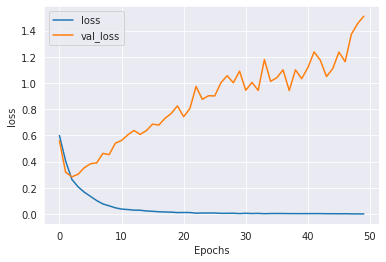

In [32]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Combining above models to remove over fitting

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 120, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 128)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 29, 128)           98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                

In [34]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
1250/1250 [==============================] - 99s 79ms/step - loss: 0.3653 - accuracy: 0.8328 - val_loss: 0.2903 - val_accuracy: 0.8808
Epoch 2/50
1250/1250 [==============================] - 99s 79ms/step - loss: 0.2350 - accuracy: 0.9061 - val_loss: 0.3119 - val_accuracy: 0.8677
Epoch 3/50
1250/1250 [==============================] - 102s 81ms/step - loss: 0.1733 - accuracy: 0.9354 - val_loss: 0.2770 - val_accuracy: 0.8837
Epoch 4/50
1250/1250 [==============================] - 98s 79ms/step - loss: 0.1220 - accuracy: 0.9561 - val_loss: 0.3346 - val_accuracy: 0.8774
Epoch 5/50
1250/1250 [==============================] - 99s 79ms/step - loss: 0.0800 - accuracy: 0.9725 - val_loss: 0.3664 - val_accuracy: 0.8801
Epoch 6/50
1250/1250 [==============================] - 97s 78ms/step - loss: 0.0572 - accuracy: 0.9805 - val_loss: 0.4691 - val_accuracy: 0.8799
Epoch 7/50
1250/1250 [==============================] - 98s 78ms/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.5321 

# Plotting accuracy and loss

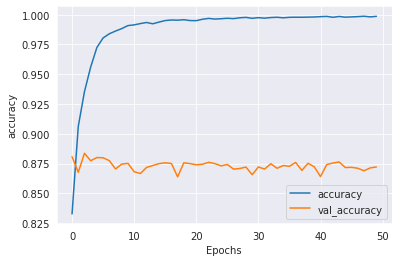

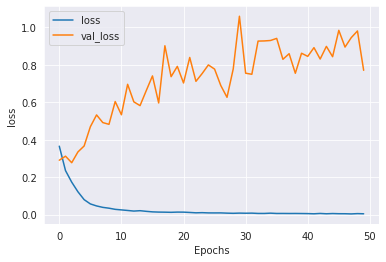

In [35]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')